In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#dataset
df = pd.read_csv("data/anuncios.csv")
df.head()

,idade,salario,comprou
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
#normalizing the data
x, y = df.idade.values.reshape(-1,1), df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 1) (400, 1)


Text(0, 0.5, 'comprou?')

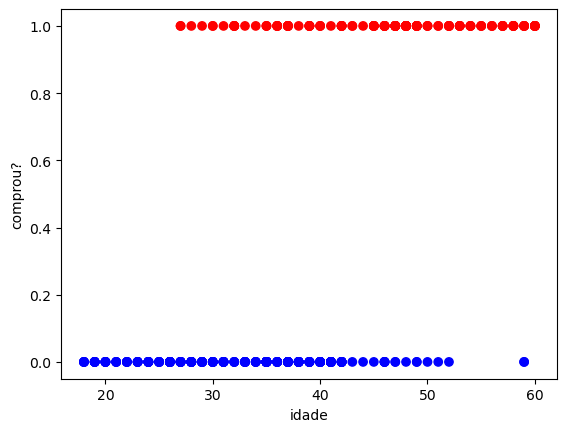

In [7]:
plt.scatter(x, y, c=y, cmap='bwr')
plt.xlabel('idade')
plt.ylabel('comprou?')



In [8]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 0.9999999999999996


In [9]:
clf_sk = LogisticRegression(C=1e15)
clf_sk.fit(x, y.ravel())

print(clf_sk.coef_, clf_sk.intercept_)
print(clf_sk.score(x, y))

[[3.96794251]] [-0.67510634]
0.84


Text(0, 0.5, 'comprou?')

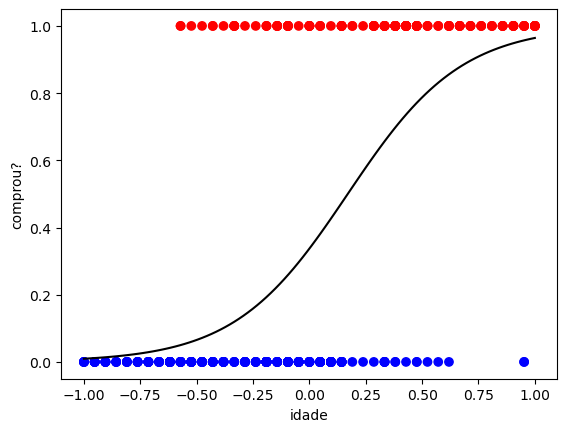

In [10]:
x_test = np.linspace(x.min(), x.max(), 100).reshape(-1,1)
y_sk = clf_sk.predict_proba(x_test)

plt.scatter(x, y, c=y, cmap='bwr')
plt.plot(x_test, y_sk[:,1], color='black')
plt.xlabel('idade')
plt.ylabel('comprou?')

#Example of sigmoid implementation

In [11]:
x, y = df[['idade', 'salario']].values, df.comprou.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 2) (400, 1)


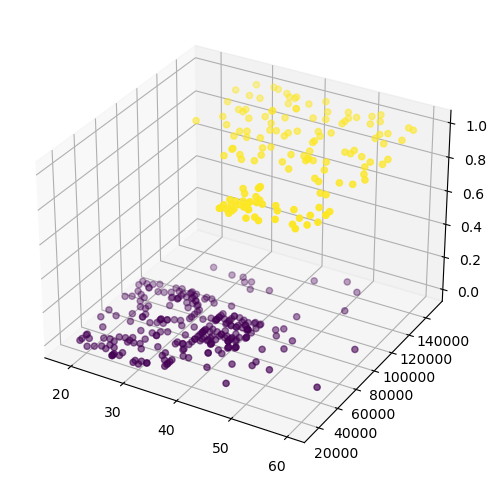

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())

In [13]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


In [14]:
clf_sk = LogisticRegression(C=1e15)
clf_sk.fit(x, y.ravel())

print(clf_sk.coef_, clf_sk.intercept_)
print(clf_sk.score(x, y))

[[4.90326048 2.42329814]] [-0.36607923]
0.845


In [18]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1x2]
b = 2*np.random.random()-1       # [1x1]

learning_rate = 1e-2 # <- tente estimar a learning rate

for step in range(301):
    z = np.dot(x, w.T) + b
    y_pred = sigmoid(z)
    error = y - y_pred

    w = w + learning_rate * np.dot(error.T, x)
    b = b + learning_rate * error.sum()

    if step % 100 ==0:
        cost = np.mean( -y *np.log(y_pred) - (1-y) * np.log(1 - y_pred))
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 0.6967769419503957
step 100: 0.3463542521727192
step 200: 0.34631433448401355
step 300: 0.3463142282883726
w:  [[4.9030271  2.42319146]]
b:  -0.3660750896330893


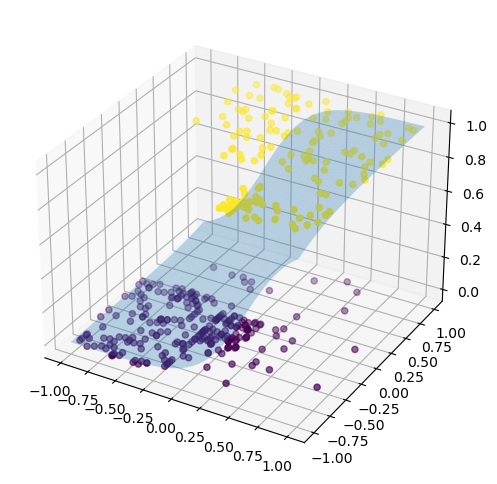

In [19]:
x1 = np.linspace(x[:, 0].min(), x[:, 0].max())
x2 = np.linspace(x[:, 1].min(), x[:, 1].max())
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x1_mesh = x1_mesh.reshape(-1, 1)
x2_mesh = x2_mesh.reshape(-1, 1)

x_mesh = np.hstack((x1_mesh, x2_mesh))
y_pred = sigmoid(np.dot(x_mesh, w.T) + b)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())
ax.plot_trisurf(x1_mesh.ravel(), x2_mesh.ravel(), y_pred.ravel(), alpha=0.3, shade=False)

In [ ]:
#Comparing Sklearn with our implementation
print('Acurácia pelo Scikit-learn: {:.2f}%'.format(clf_sk.score(x, y)*100))

y_pred = np.round(sigmoid(np.dot(x, w.T) + b))
print('Acurária pela nossa implementação: {:.2f}%'.format(accuracy_score(y, y_pred)*100))

Acurácia pelo Scikit-learn: 84.50%
Acurária pela nossa implementação: 84.50%
